<a href="https://colab.research.google.com/github/HR-HBM/BENG_BME-Project/blob/main/Project_Model_w_o_CLAHE_(ME_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/MaculaEdema/train"
TEST_DIR = "/content/drive/MyDrive/MaculaEdema/test"
VAL_DIR = "/content/drive/MyDrive/MaculaEdema/validate"

In [ ]:
train_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32, class_mode="categorical")

Found 4784 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator()

val_set = train_datagen.flow_from_directory(VAL_DIR, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 579 images belonging to 2 classes.


In [ ]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False


27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Rescaling(1./255, input_shape=IMG_SHAPE),  # Normalize the image within the model
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

print(model.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb1 (Functional)          │ (None, 7, 7, 1280)          │       6,575,239 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 7, 7, 1280)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,050,185 (30.71 MB)

 Trainable params: 1,474,946 (5.63 MB)

 Non-trainable params: 6,575,239 (25.08 MB)

None


In [ ]:
batch_size = 32
epochs = 50

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), #Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=train_set, validation_data=val_set, batch_size=batch_size, epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2442s 16s/step - accuracy: 0.5475 - loss: 0.6904 - val_accuracy: 0.7686 - val_loss: 0.6828
[0.6233277320861816]
[0.7685664892196655]


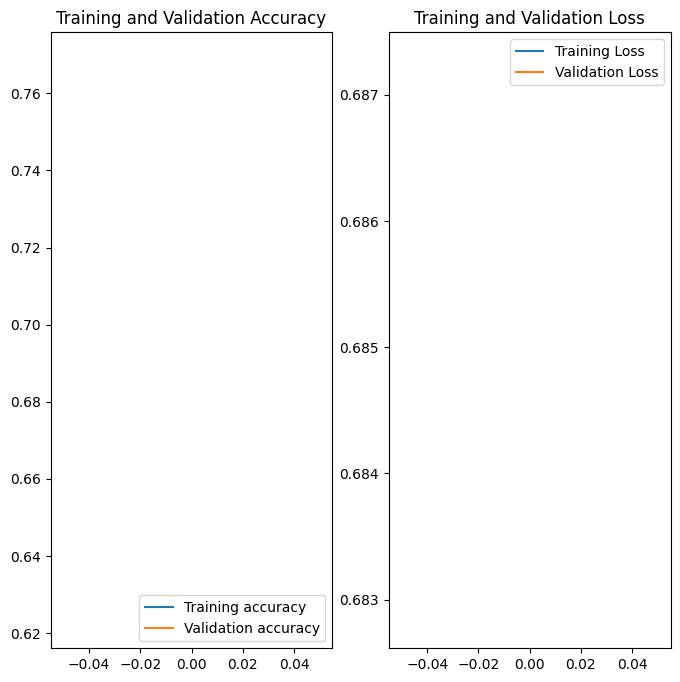

In [ ]:
epochs_range = range(50)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/MaculaEdema/MaculaEdema.h5")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib as plt

TRAIN_DIR = "/content/drive/MyDrive/MaculaEdema/train"
TEST_DIR = "/content/drive/MyDrive/MaculaEdema/test"
VAL_DIR = "/content/drive/MyDrive/MaculaEdema/validate"

train_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), batch_size=32, class_mode="categorical")

val_datagen = ImageDataGenerator()

val_set = train_datagen.flow_from_directory(VAL_DIR, target_size=(224, 224), batch_size=32, class_mode="categorical")

IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Rescaling(1./255, input_shape=IMG_SHAPE),  # Normalize the image within the model
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

print(model.summary())

batch_size = 32
epochs = 50

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), #Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=train_set, validation_data=val_set, batch_size=batch_size, epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)

epochs_range = range(len(acc))
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

model.save("/content/drive/MyDrive/MaculaEdema/MaculaEdema.h5")
